In [1]:
library(survivalROC)

Warning message:
"package 'survivalROC' was built under R version 4.0.3"


In [2]:
data<- read.csv('scores-train.csv',sep=',')
nobs=NROW(data)
data$OS<-data$OS*30
data$DFS<-data$DFS*30
cutoff=730 #730, 1095, 1825, 2555, 3650
head(data)

,Num,Patient,Y1,OS,Y2,DFS,CS,RS
,<int>,<chr>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
1,1,SICK0000022,0,626,0,337,-0.23863495,0.11873860
2,2,SICK0000027,1,2240,0,948,-0.14046747,0.07578419
3,3,SICK0000053,1,1759,1,1759,-0.23863495,0.11509943
4,4,SICK0000085,1,1756,1,1756,0.07073490,0.16582503
5,5,SICK0000213,0,1213,0,413,0.04695314,-0.07379806
6,6,SICK0000269,1,2849,1,2849,-0.23863495,-0.11292887


# 2-year OS

### Clinical Score

In [3]:
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.863 0.828 0.755 0.276 ...
 $ FP          : num [1:20] 1 0.938 0.924 0.893 0.72 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.24


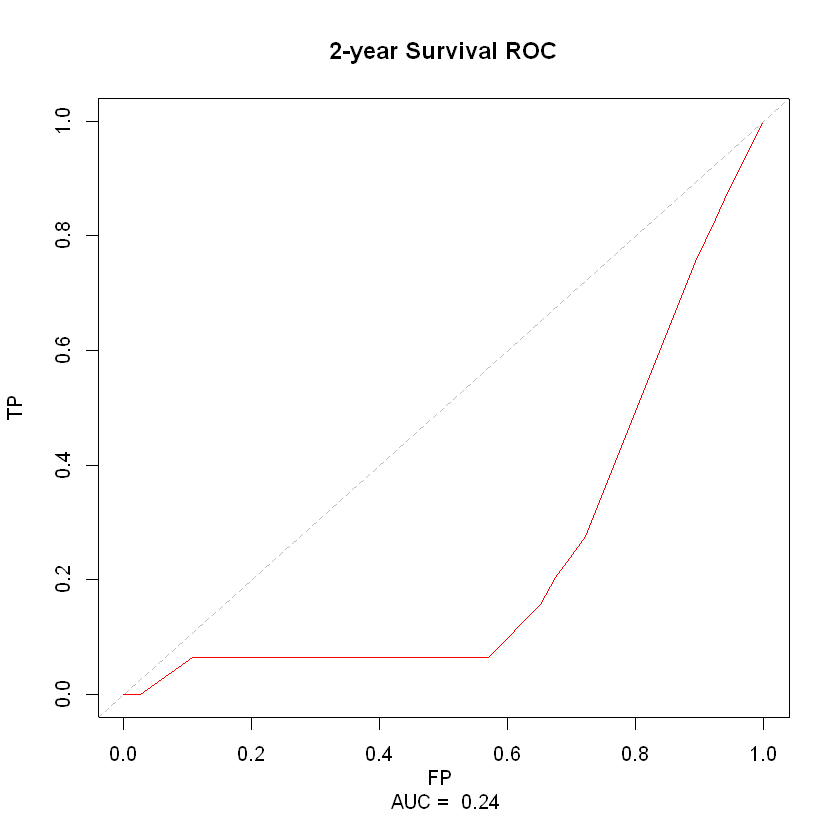

In [4]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

### another method

In [5]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.752 0.752 0.753 0.248 ...
 $ FP          : num [1:20] 1 0.939 0.925 0.892 0.721 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.202


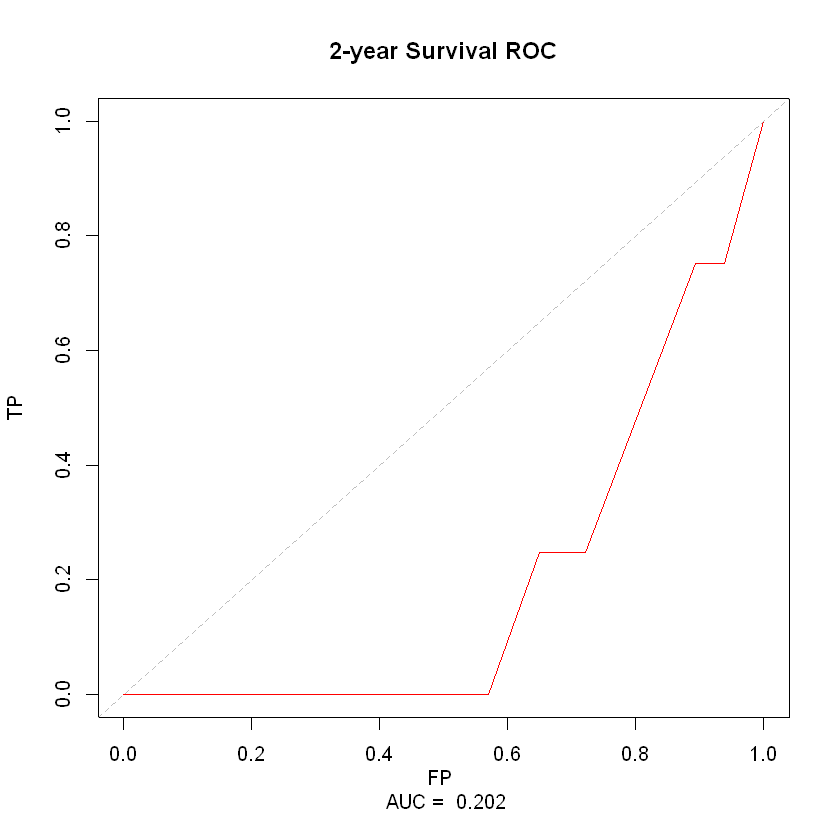

In [6]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [7]:
data2= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.988 0.976 0.965 0.954 ...
 $ FP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.575


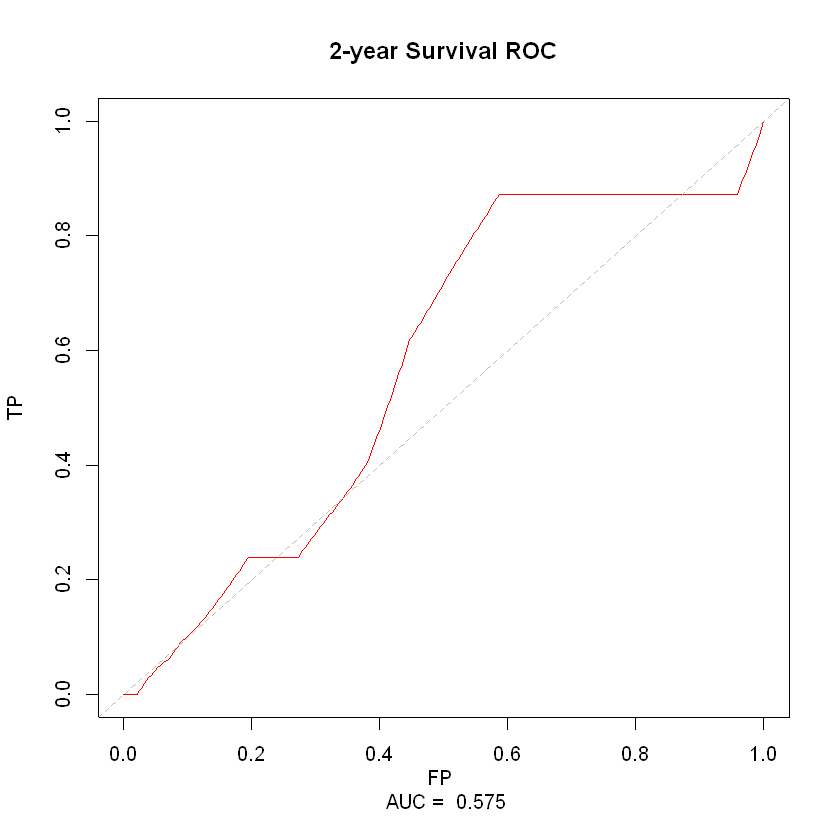

In [8]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [9]:
data2= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.986
 $ AUC         : num 0.509


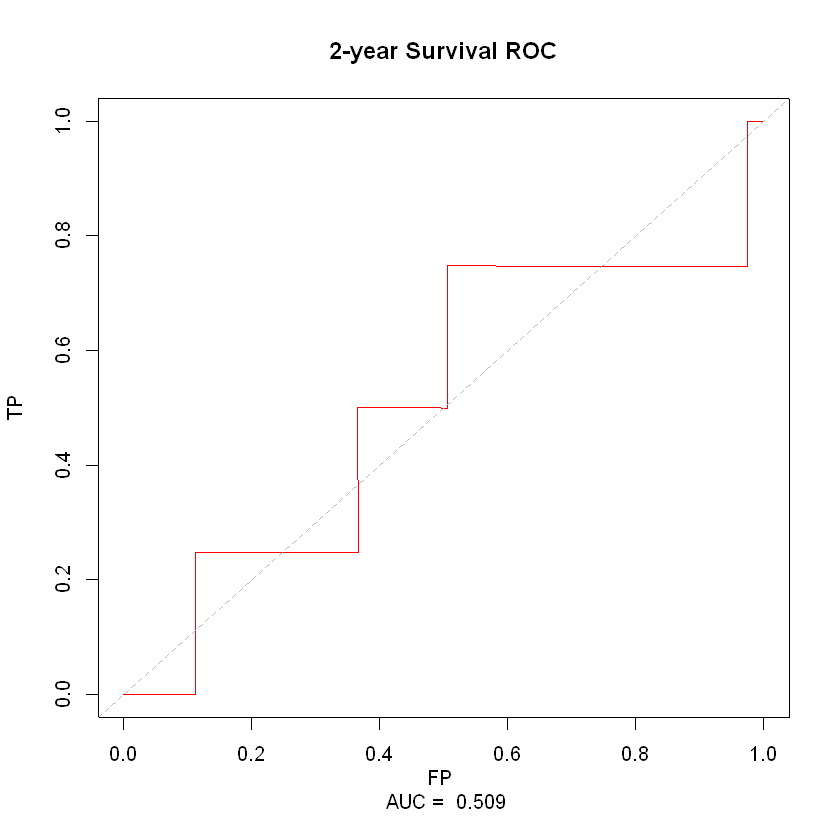

In [10]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year Survival ROC")
abline(0,1,col="gray",lty=2)

# 2-year DFS

### Clinical Score

In [11]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 1 0.962 0.844 0.0689 ...
 $ FP          : num [1:20] 1 0.936 0.922 0.891 0.72 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.229


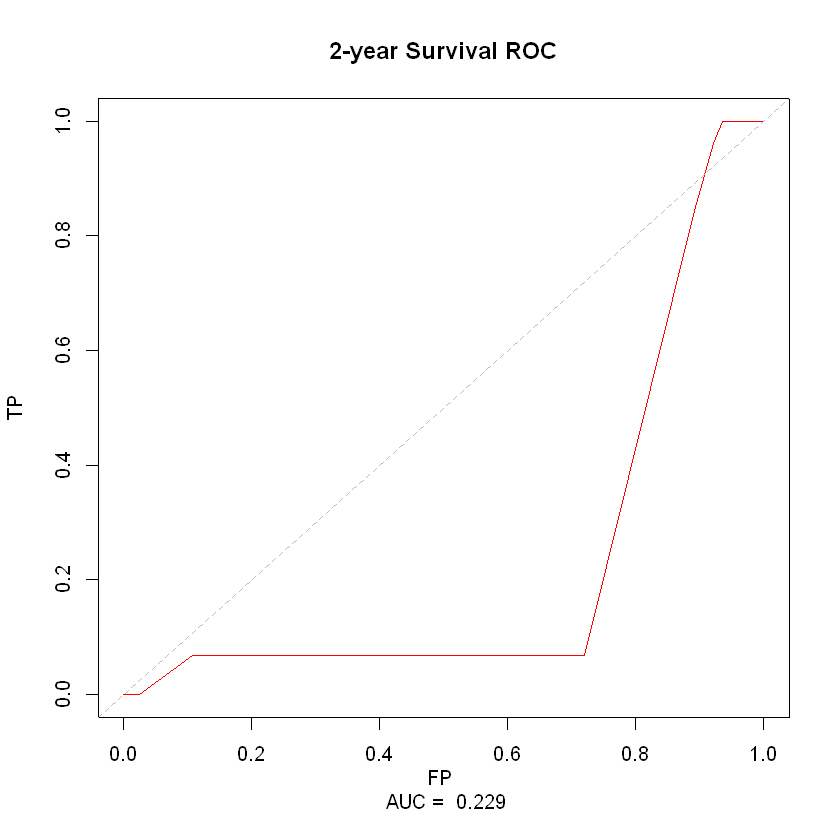

In [12]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [13]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 1 1 1 0 ...
 $ FP          : num [1:20] 1 0.936 0.922 0.89 0.719 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.196


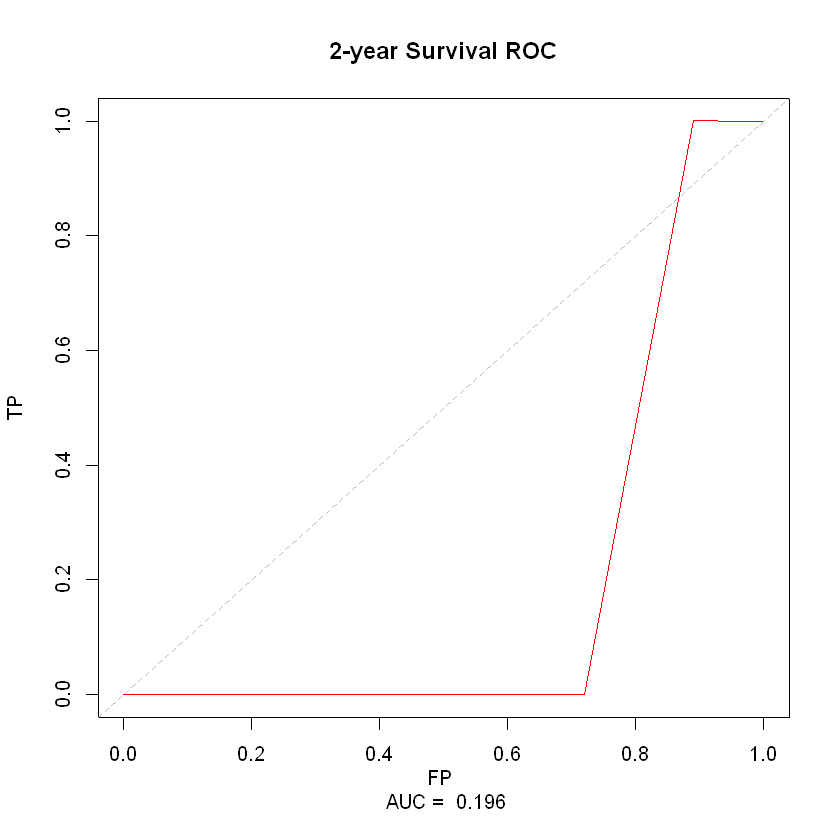

In [14]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [15]:
data2= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data2)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.968 0.937 0.908 0.879 ...
 $ FP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.444


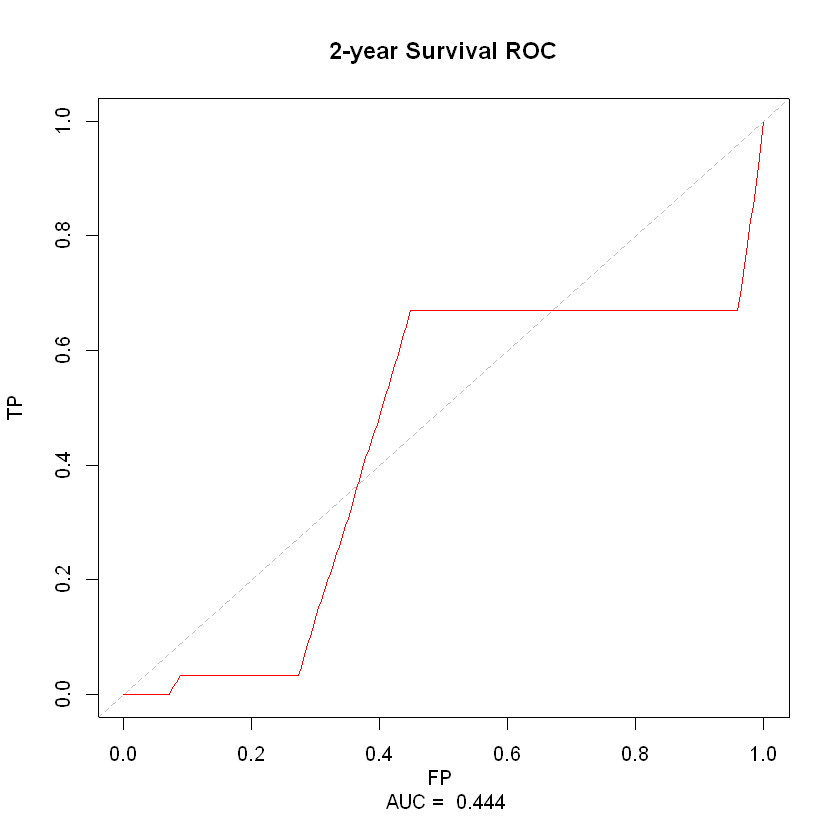

In [16]:
plot(data2$FP, data2$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), ##连接
     ylab="TP",
     main="2-year Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [17]:
data2= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data2)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ predict.time: num 730
 $ Survival    : num 0.993
 $ AUC         : num 0.323


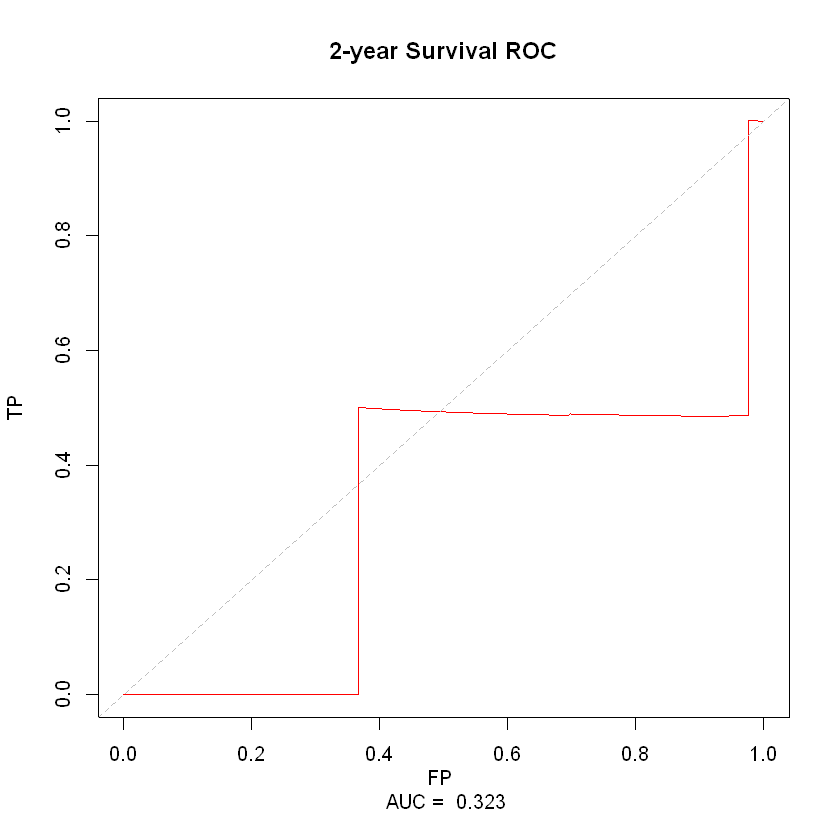

In [18]:
plot(data2$FP, data2$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data2$AUC,3)), 
     ylab="TP",
     main="2-year Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year OS

### Clinical Score

In [19]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.912 0.895 0.864 0.666 ...
 $ FP          : num [1:20] 1 0.939 0.925 0.893 0.718 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.465


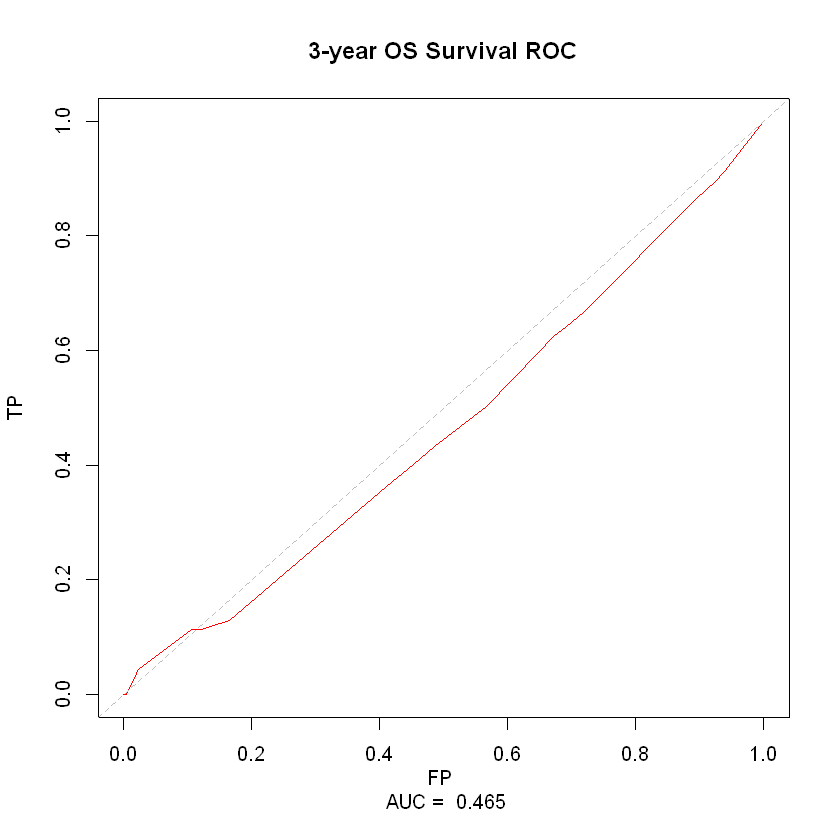

In [20]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [21]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.849 0.85 0.844 0.638 ...
 $ FP          : num [1:20] 1 0.944 0.928 0.894 0.72 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.444


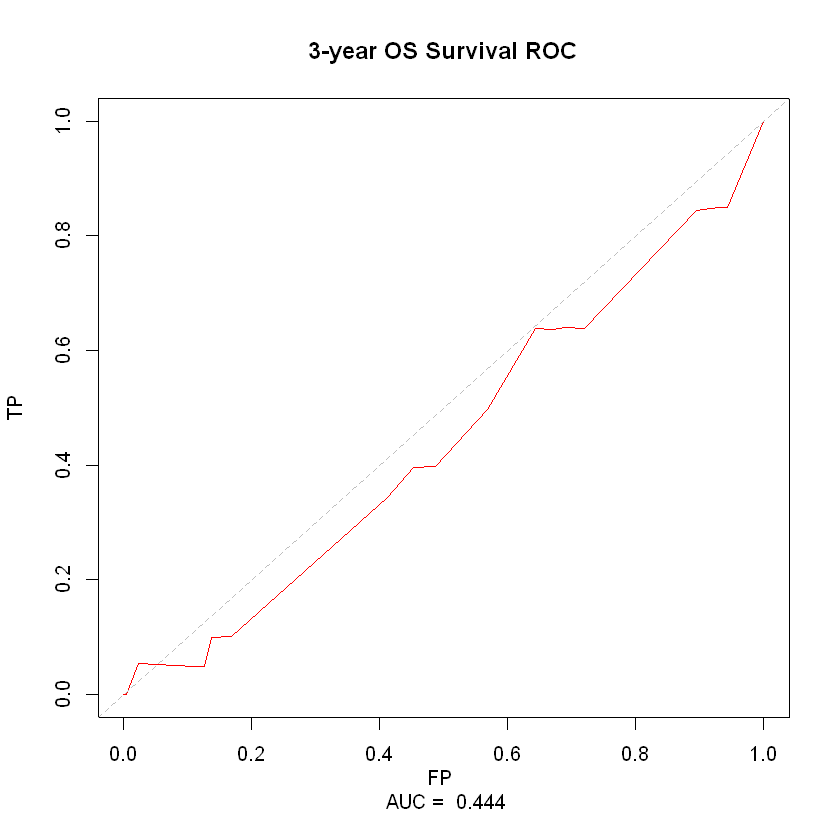

In [22]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [23]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.998 0.996 0.994 0.993 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.517


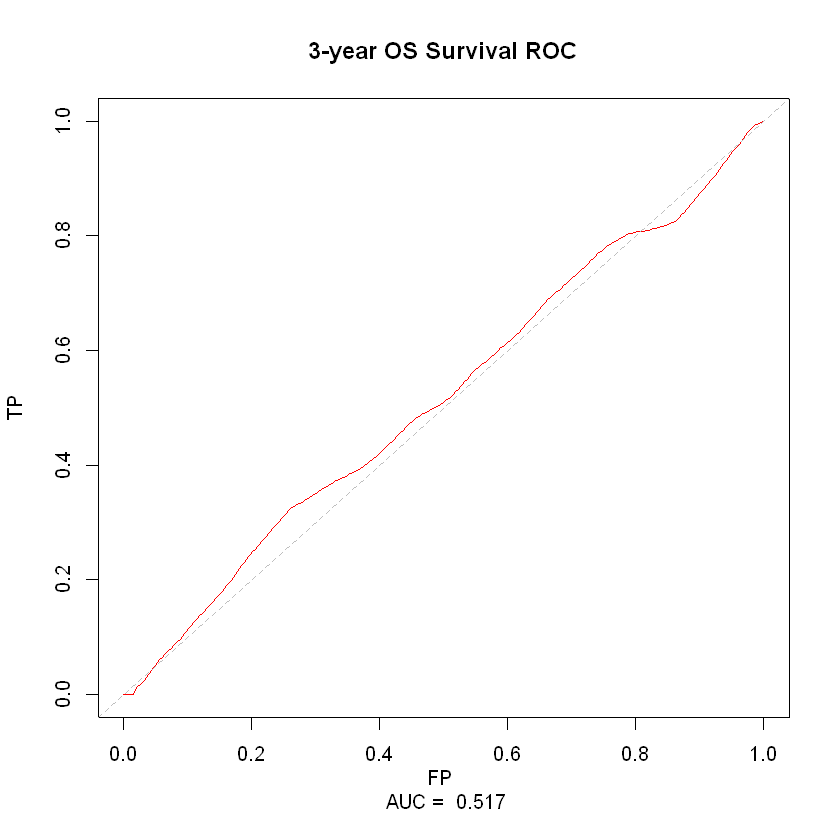

In [24]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [25]:
data3= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.992 0.988 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.923
 $ AUC         : num 0.531


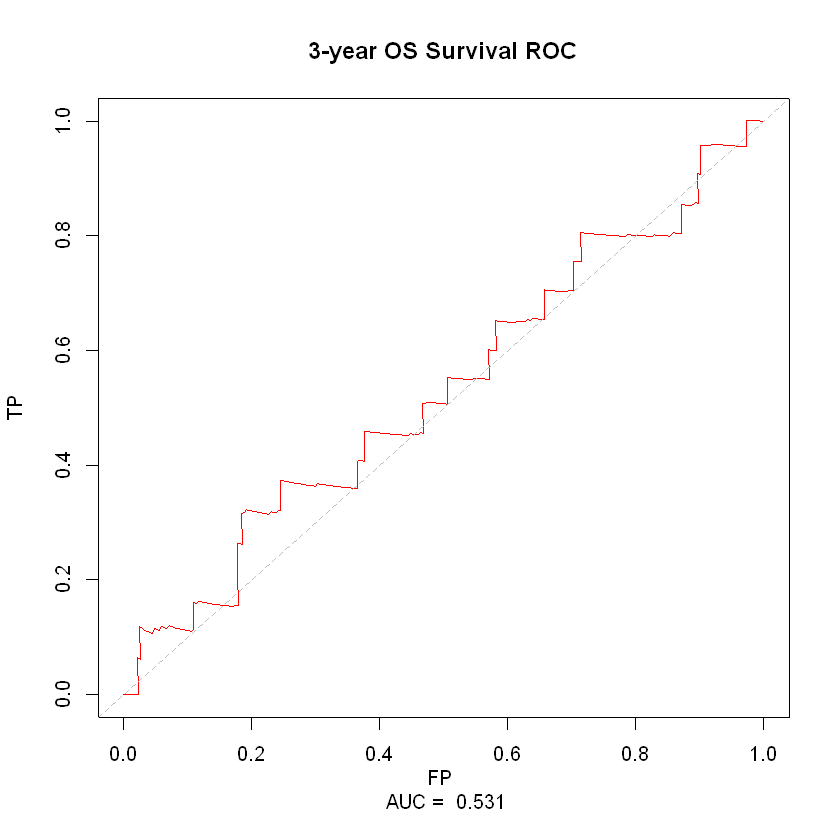

In [26]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 3-year DFS

### Clinical Score

In [27]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.92 0.888 0.679 ...
 $ FP          : num [1:20] 1 0.936 0.922 0.891 0.717 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.487


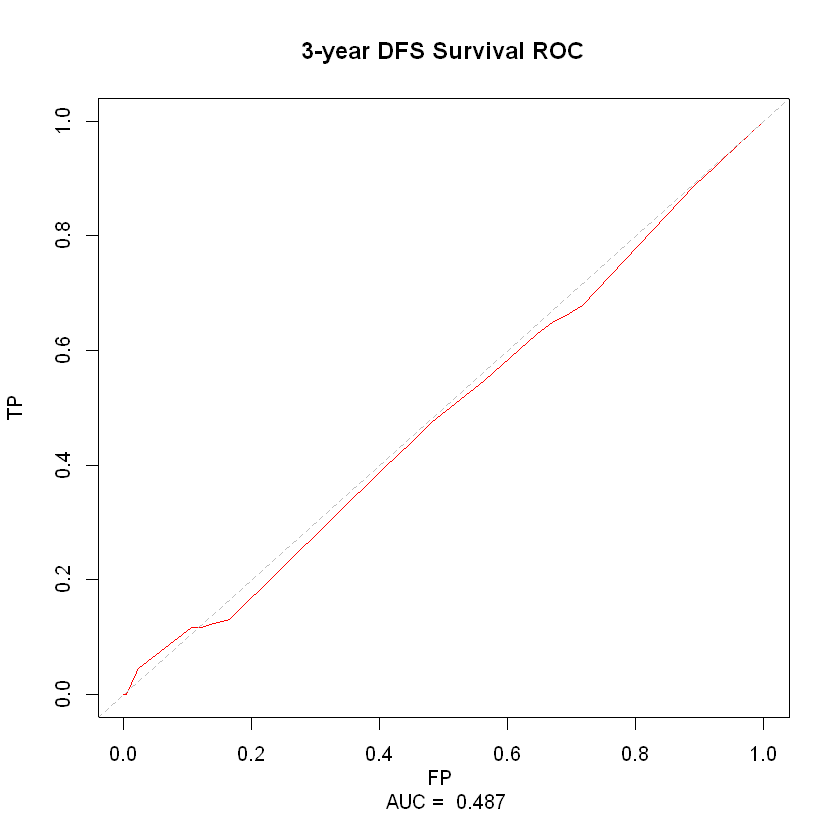

In [28]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [29]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.886 0.888 0.881 0.66 ...
 $ FP          : num [1:20] 1 0.94 0.925 0.891 0.718 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.473


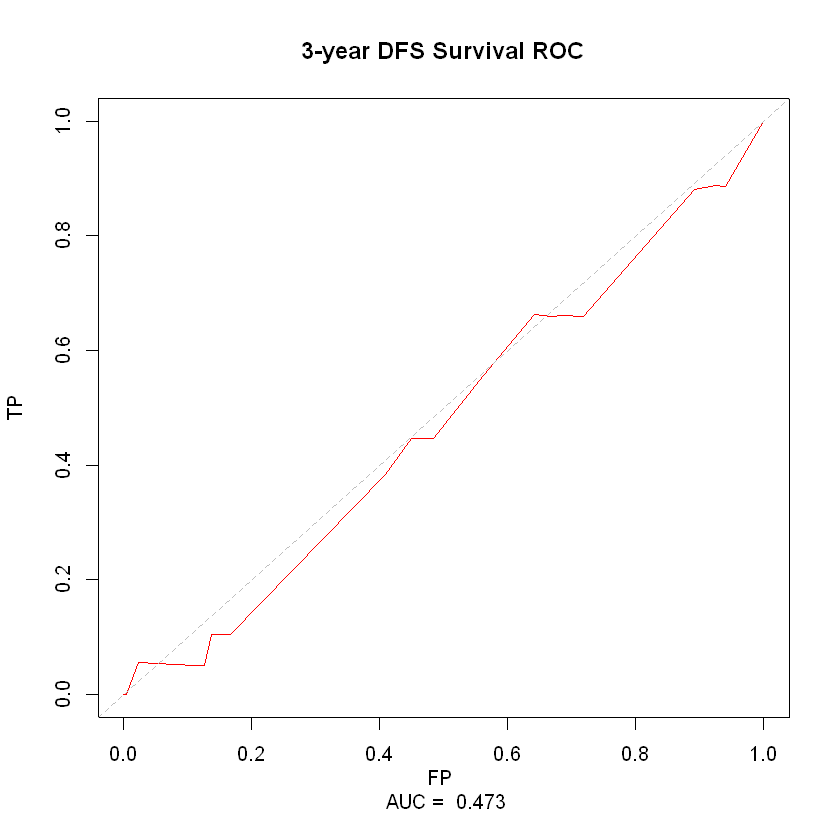

In [30]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [31]:
cutoff=1095 #730, 1095, 1825, 2555, 3650
data3= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data3)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.998 0.995 0.993 0.991 ...
 $ FP          : num [1:284] 1 0.996 0.993 0.989 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.494


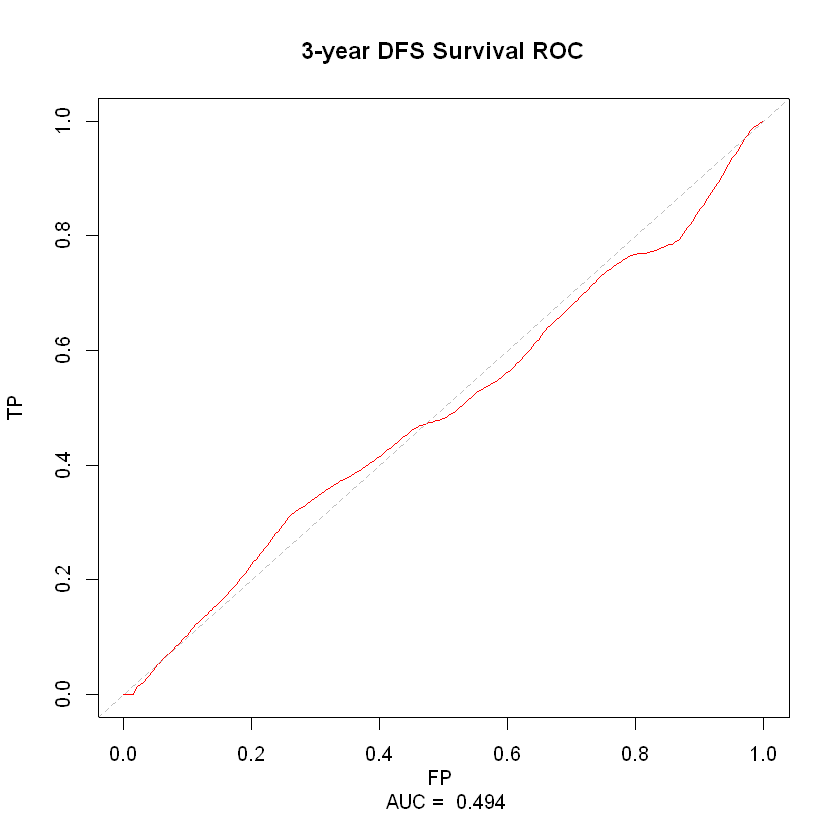

In [32]:
plot(data3$FP, data3$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), ##连接
     ylab="TP",
     main="3-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [33]:
data3= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data3)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.996 0.992 0.988 0.985 ...
 $ predict.time: num 1095
 $ Survival    : num 0.926
 $ AUC         : num 0.509


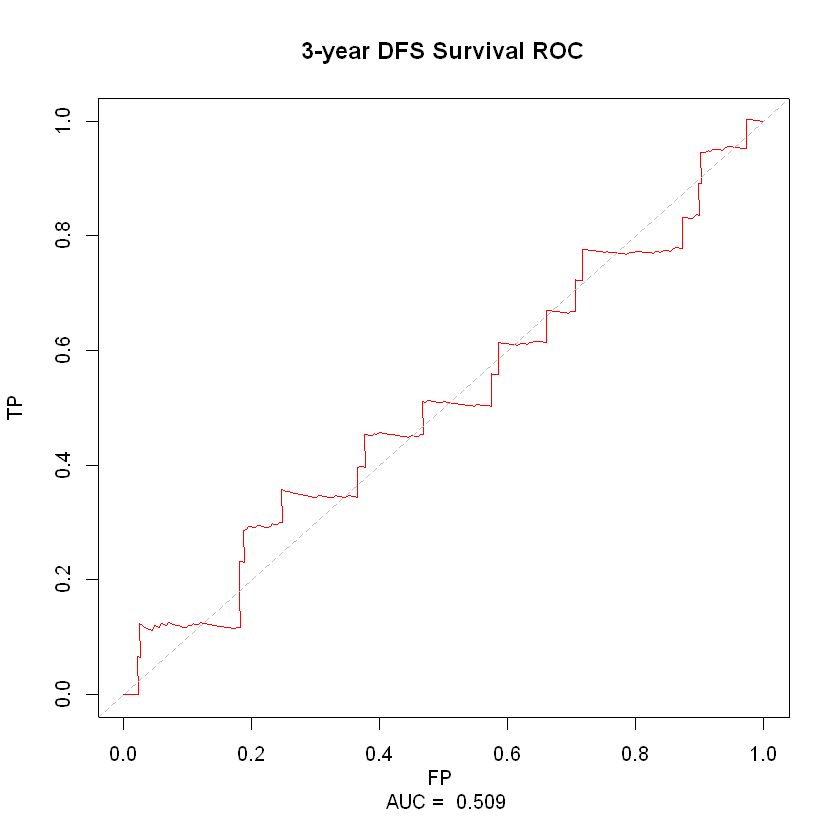

In [34]:
plot(data3$FP, data3$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data3$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year OS

### Clinical Score

In [35]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.953 0.939 0.907 0.716 ...
 $ FP          : num [1:20] 1 0.924 0.909 0.877 0.712 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.524


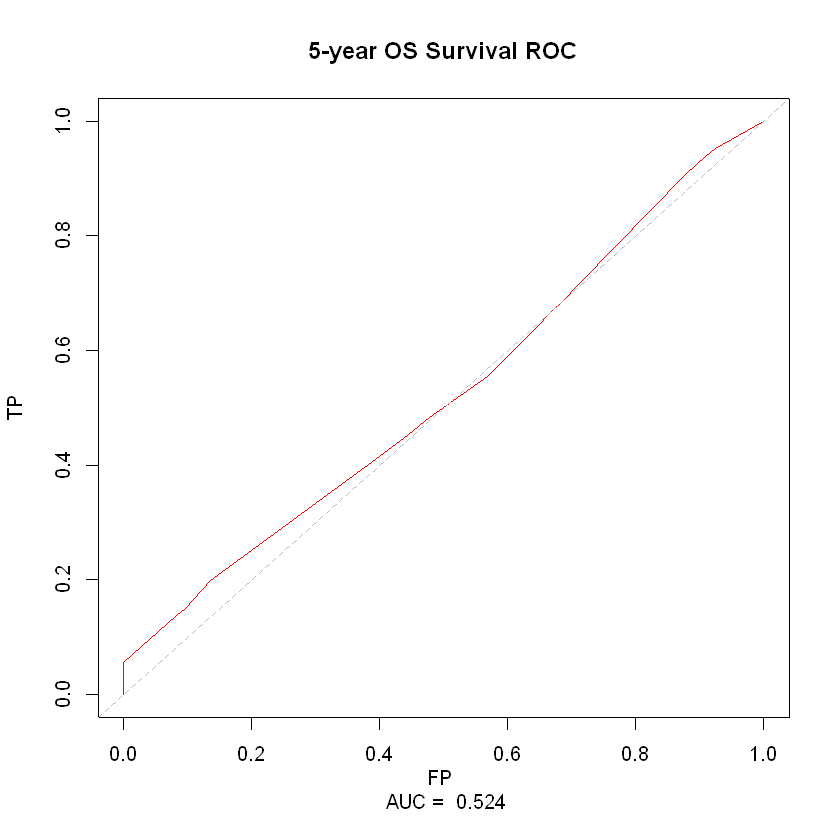

In [36]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [37]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.94 0.933 0.915 0.727 ...
 $ FP          : num [1:20] 1 0.934 0.914 0.871 0.703 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.535


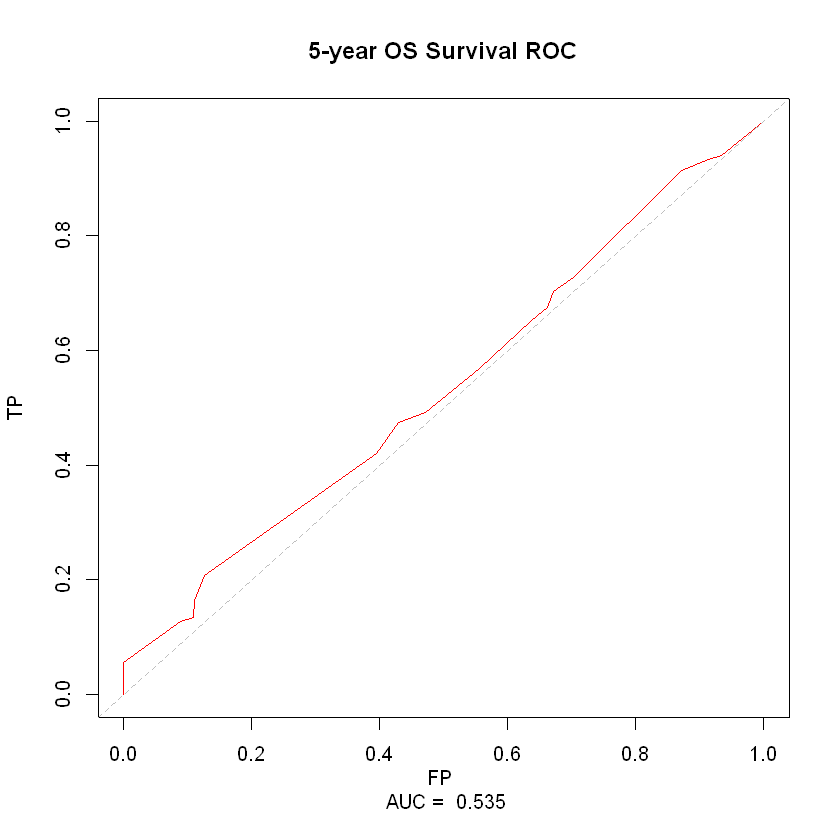

In [38]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [39]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.998 0.995 0.993 0.99 ...
 $ FP          : num [1:284] 1 0.996 0.991 0.987 0.982 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.624


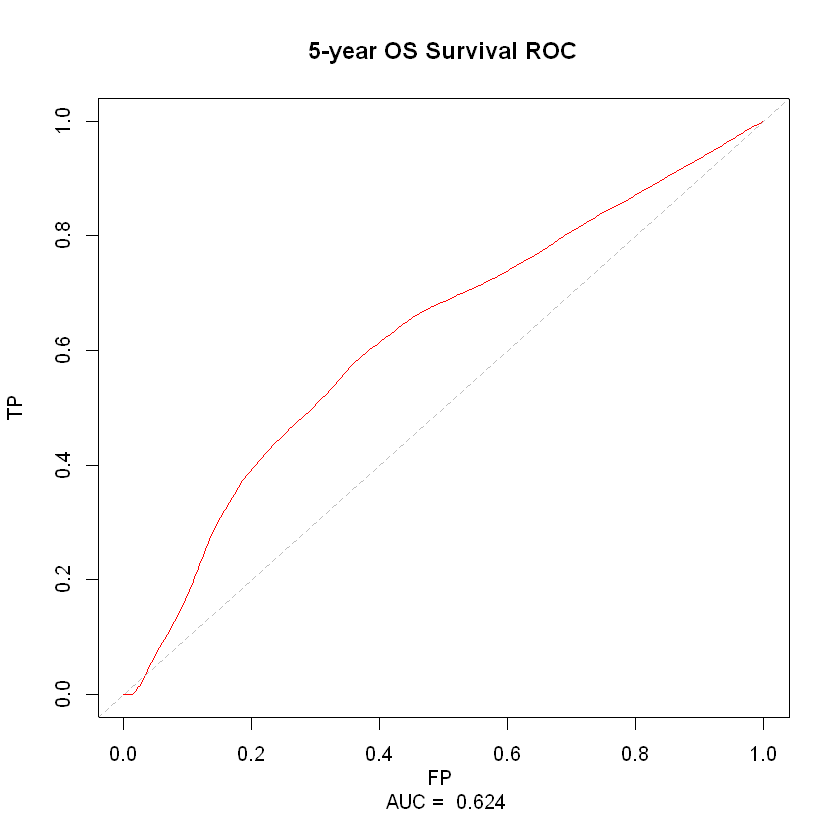

In [40]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [41]:
data5= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.98 0.973 ...
 $ predict.time: num 1825
 $ Survival    : num 0.554
 $ AUC         : num 0.63


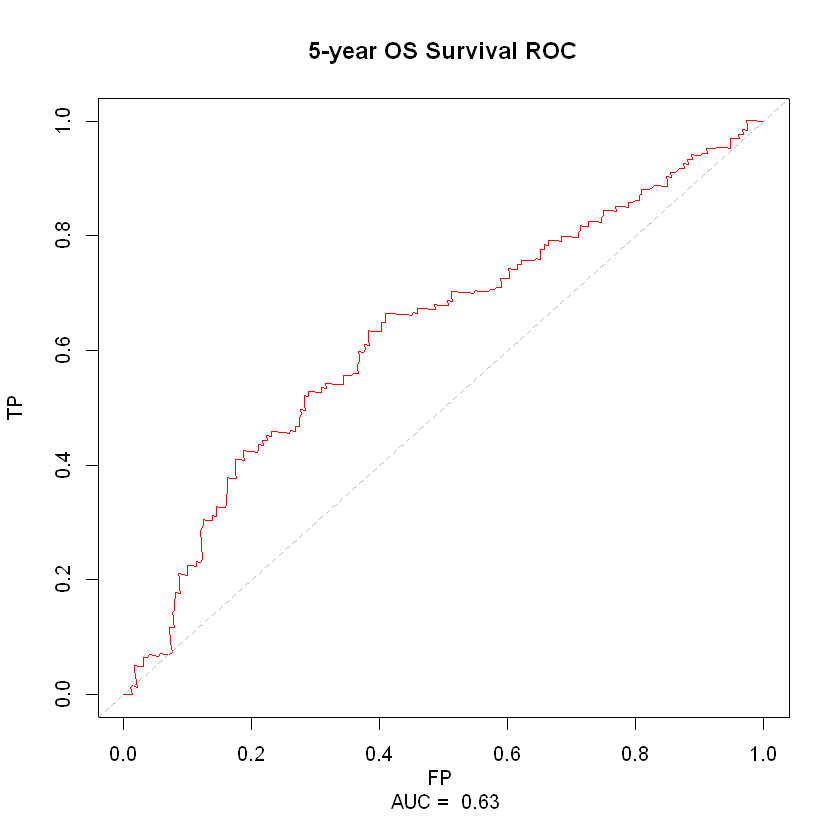

In [42]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 5-year DFS

### Clinical Score

In [43]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.956 0.943 0.911 0.721 ...
 $ FP          : num [1:20] 1 0.922 0.907 0.875 0.708 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.53


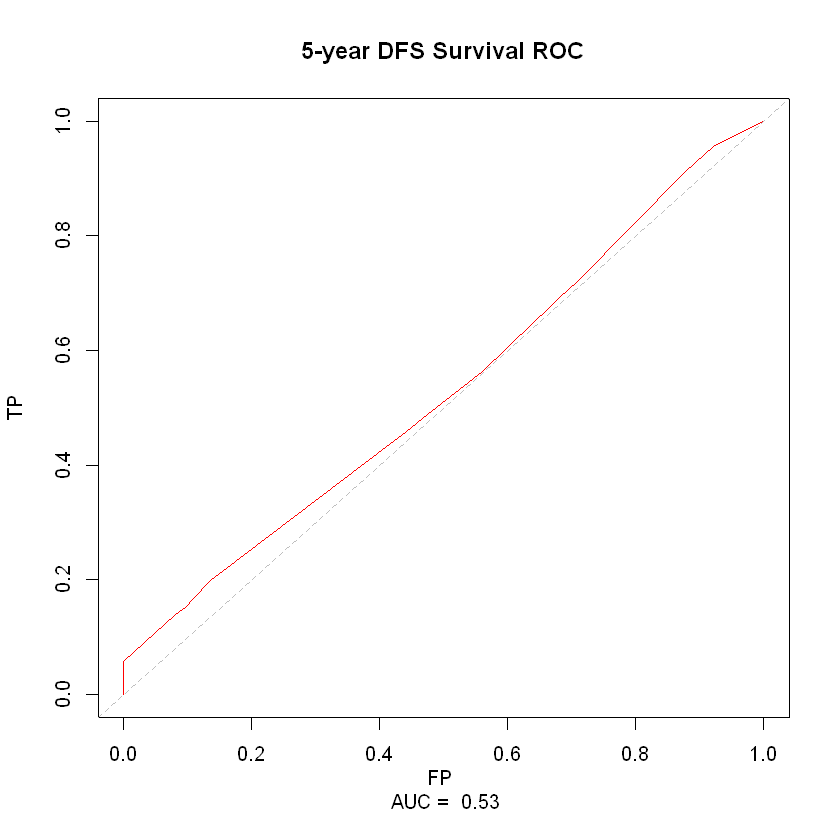

In [44]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [45]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.948 0.941 0.921 0.735 ...
 $ FP          : num [1:20] 1 0.927 0.908 0.867 0.697 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.543


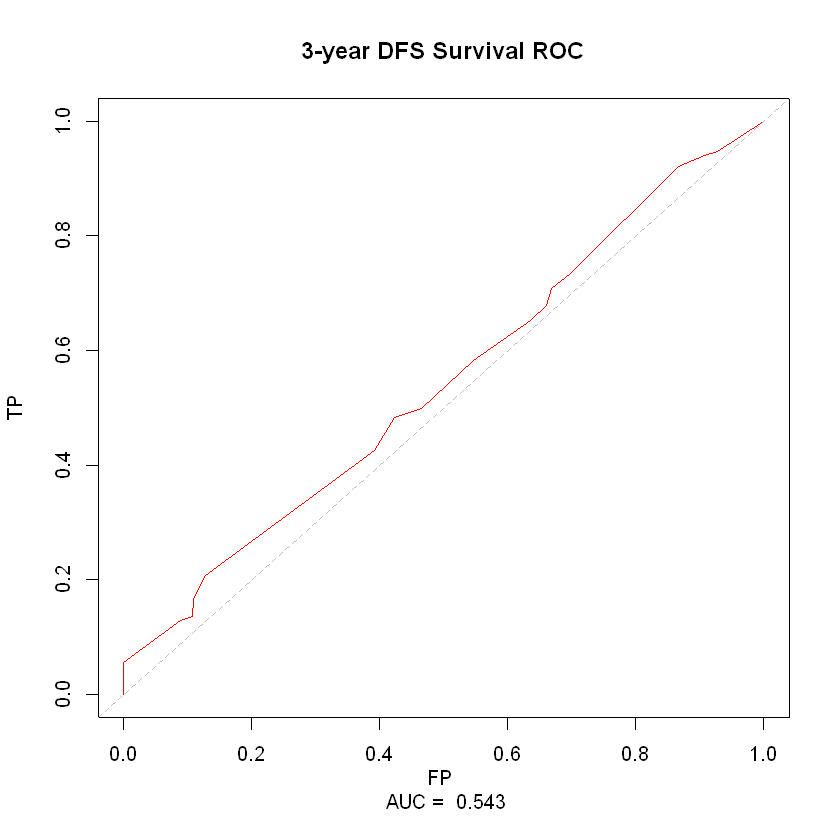

In [46]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="3-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [47]:
cutoff=1825 #730, 1095, 1825, 2555, 3650
data5= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data5)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.994 0.991 0.988 ...
 $ FP          : num [1:284] 1 0.996 0.992 0.988 0.984 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.609


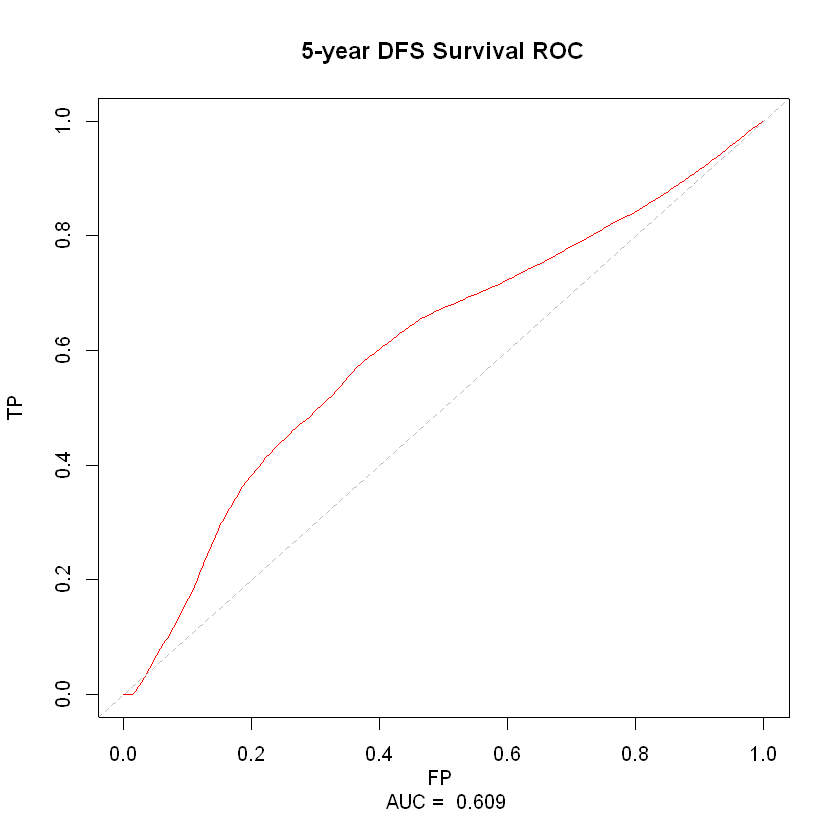

In [48]:
plot(data5$FP, data5$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), ##连接
     ylab="TP",
     main="5-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [49]:
data5= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data5)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.979 0.973 ...
 $ predict.time: num 1825
 $ Survival    : num 0.561
 $ AUC         : num 0.615


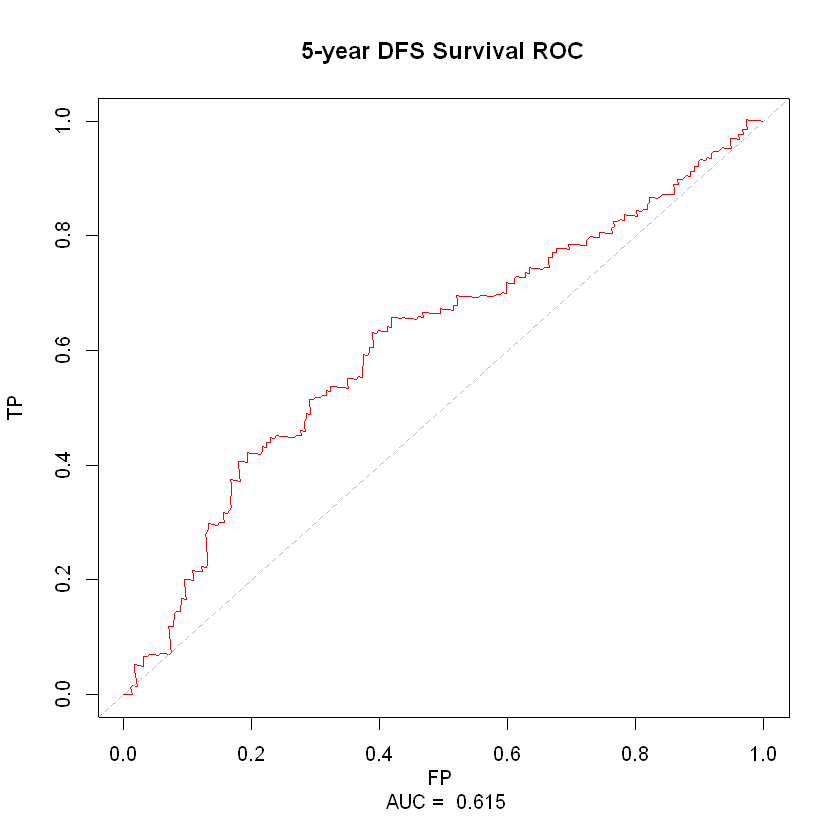

In [50]:
plot(data5$FP, data5$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data5$AUC,3)), 
     ylab="TP",
     main="5-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year OS

### Clinical Score

In [51]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.942 0.928 0.896 0.717 ...
 $ FP          : num [1:20] 1 0.915 0.9 0.869 0.702 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.502


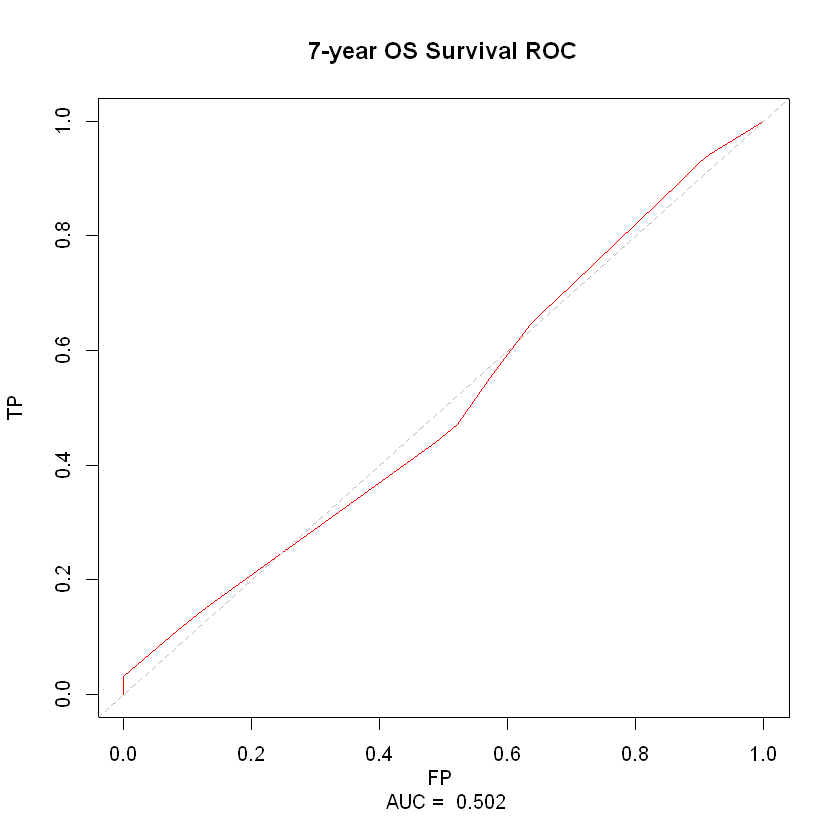

In [52]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [53]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.937 0.929 0.897 0.717 ...
 $ FP          : num [1:20] 1 0.934 0.897 0.864 0.701 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.504


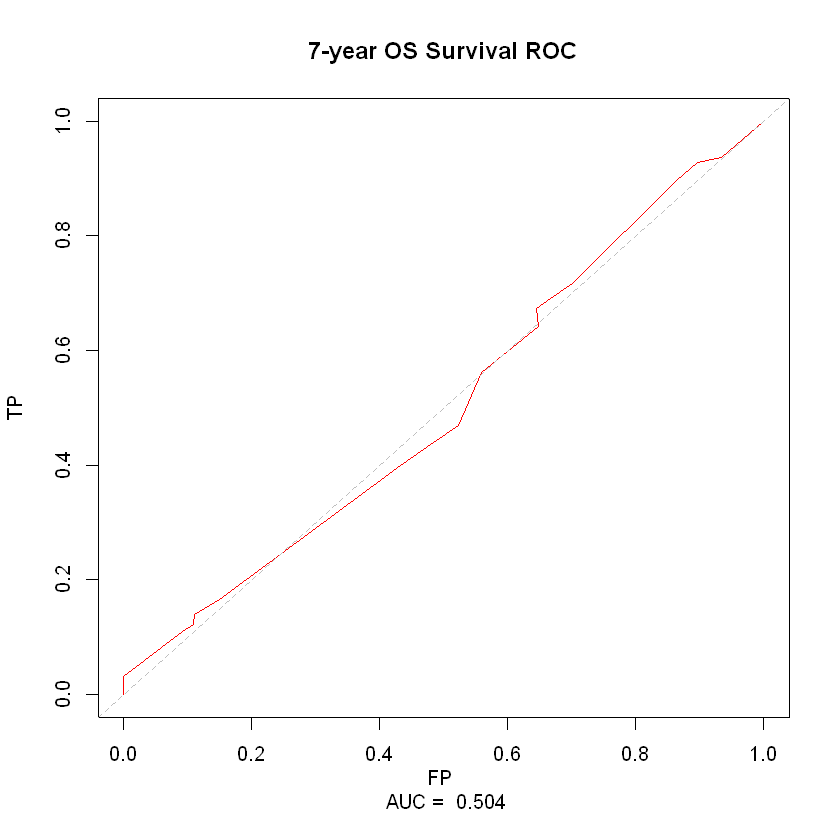

In [54]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [55]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.995 0.992 0.989 ...
 $ FP          : num [1:284] 1 0.993 0.986 0.979 0.972 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.53


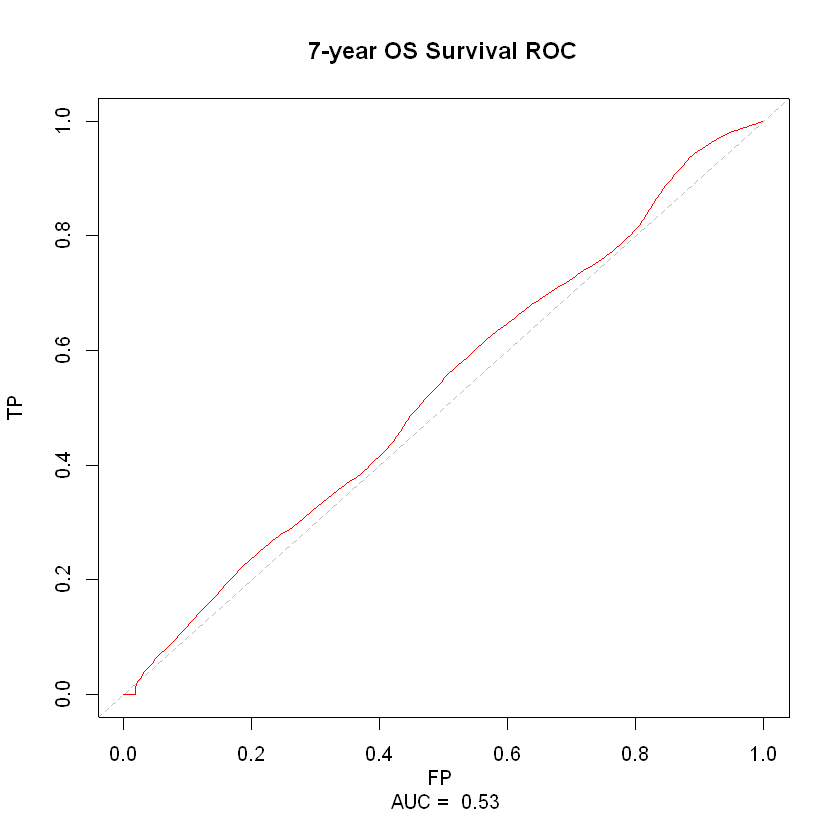

In [56]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [57]:
data7= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.981 0.962 0.943 0.924 ...
 $ predict.time: num 2555
 $ Survival    : num 0.208
 $ AUC         : num 0.574


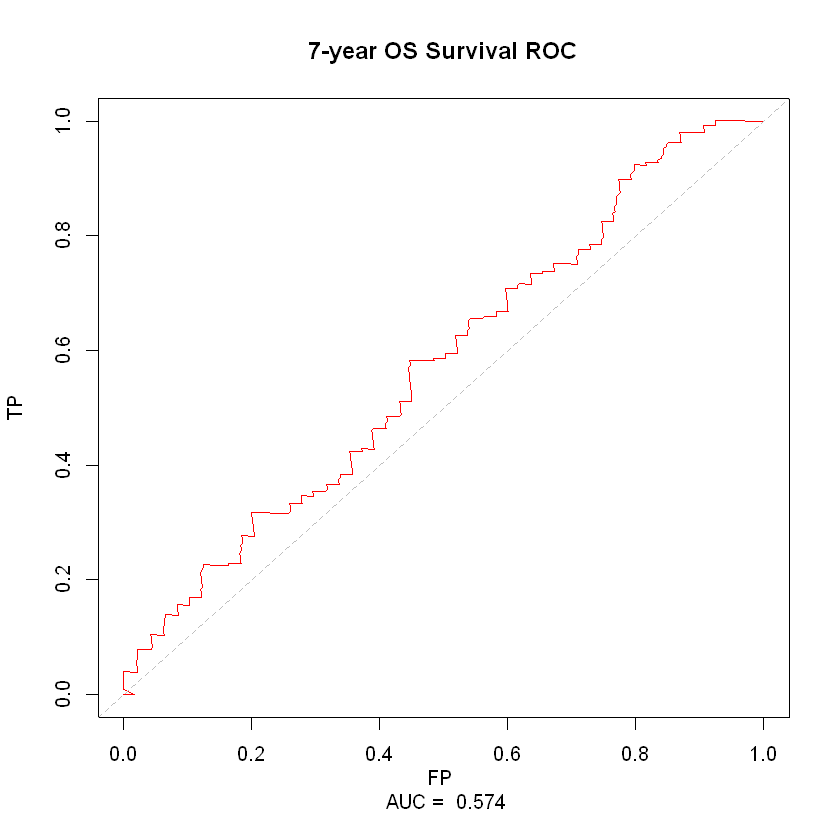

In [58]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 7-year DFS

### Clinical Score

In [59]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.94 0.926 0.894 0.713 ...
 $ FP          : num [1:20] 1 0.922 0.908 0.879 0.718 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.502


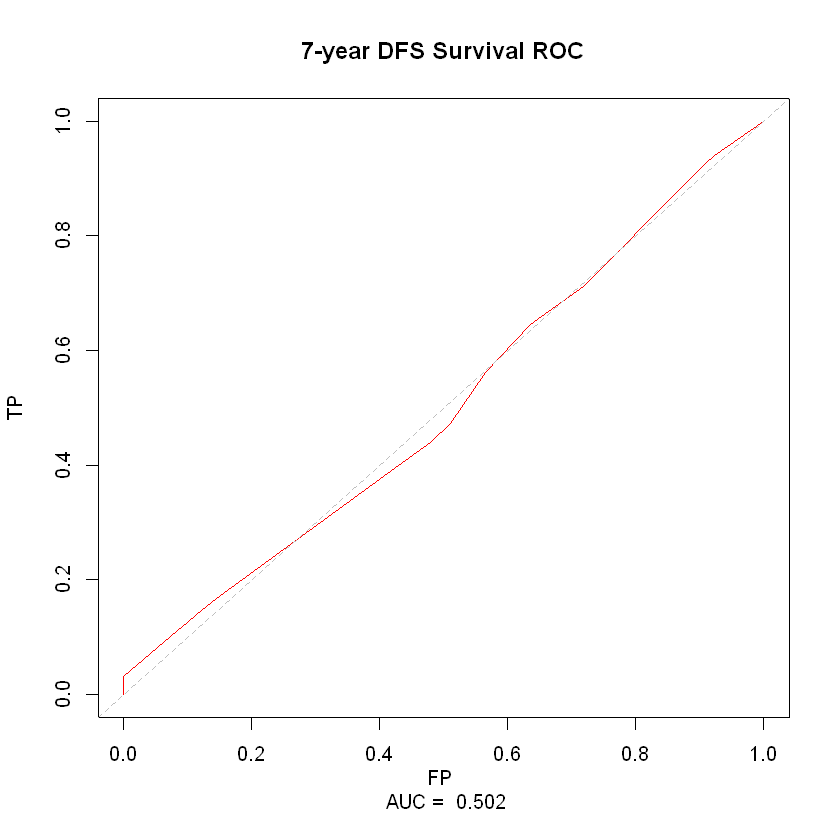

In [60]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [61]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.928 0.896 0.713 ...
 $ FP          : num [1:20] 1 0.938 0.902 0.872 0.715 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.507


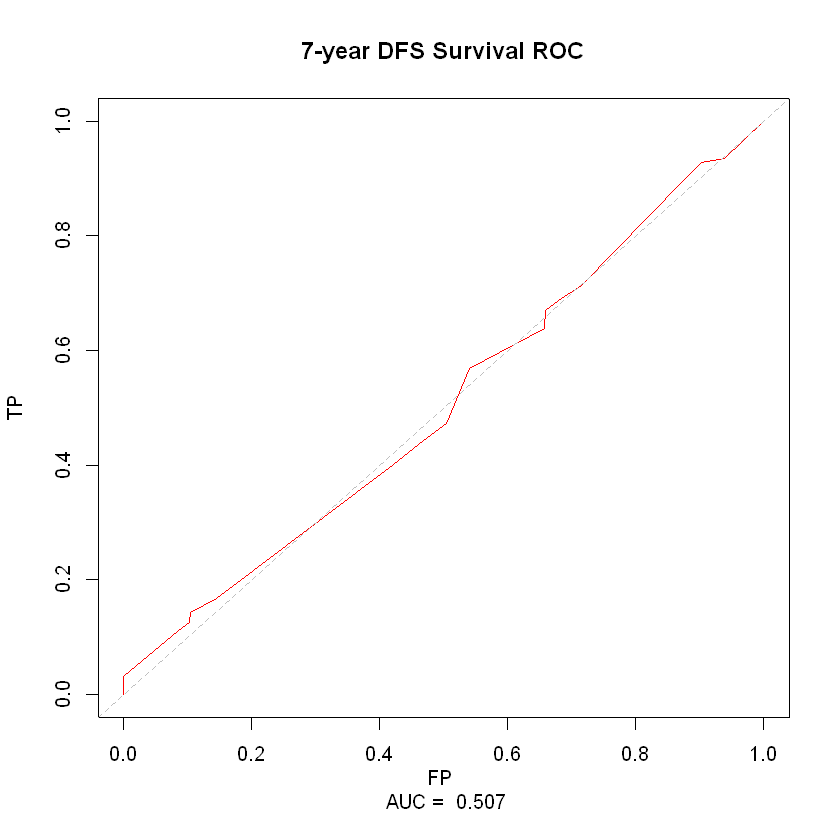

In [62]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [63]:
cutoff=2555 #730, 1095, 1825, 2555, 3650
data7= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data7)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.994 0.991 0.988 ...
 $ FP          : num [1:284] 1 0.994 0.988 0.983 0.977 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.512


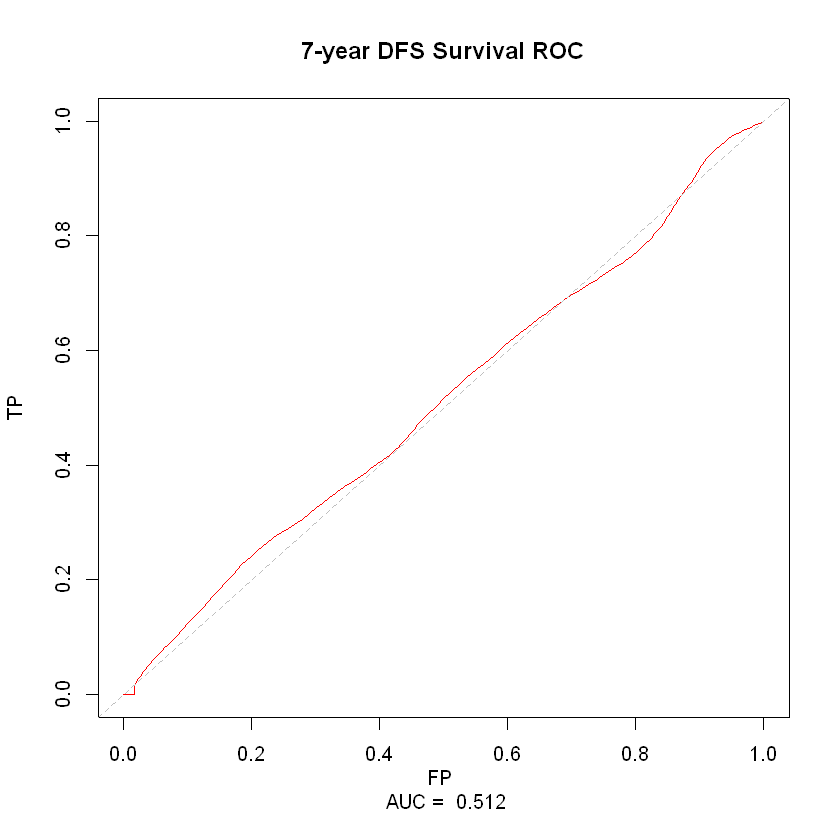

In [64]:
plot(data7$FP, data7$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), ##连接
     ylab="TP",
     main="7-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [65]:
data7= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data7)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 1 1 1 1 ...
 $ FP          : num [1:284] 1 0.981 0.963 0.944 0.925 ...
 $ predict.time: num 2555
 $ Survival    : num 0.221
 $ AUC         : num 0.56


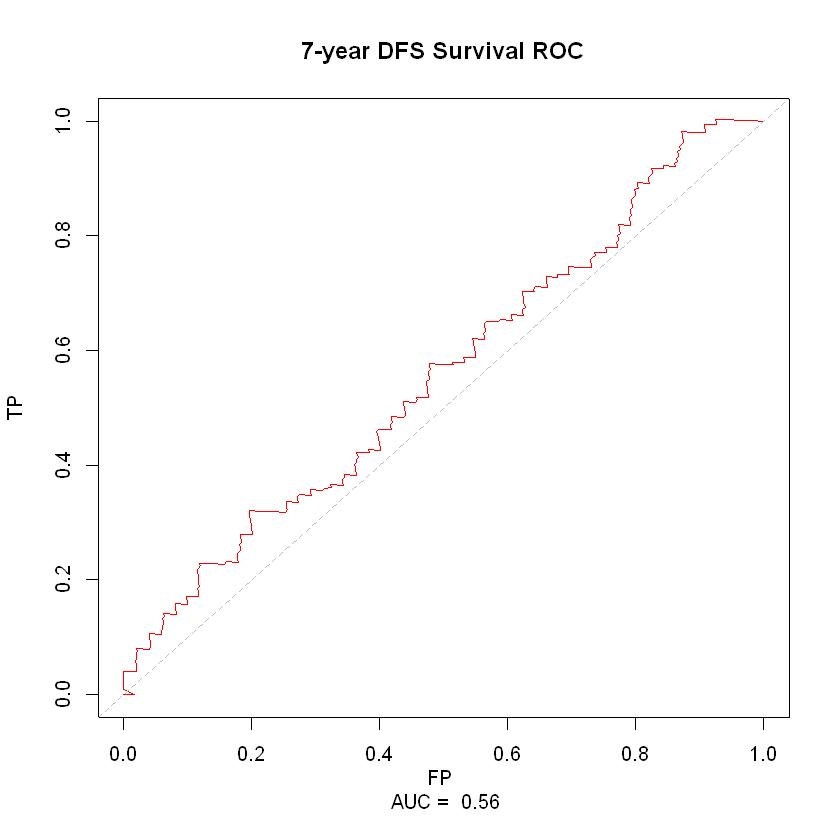

In [66]:
plot(data7$FP, data7$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data7$AUC,3)), 
     ylab="TP",
     main="7-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year OS

### Clinical Score

In [67]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.922 0.889 0.711 ...
 $ FP          : num [1:20] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.417


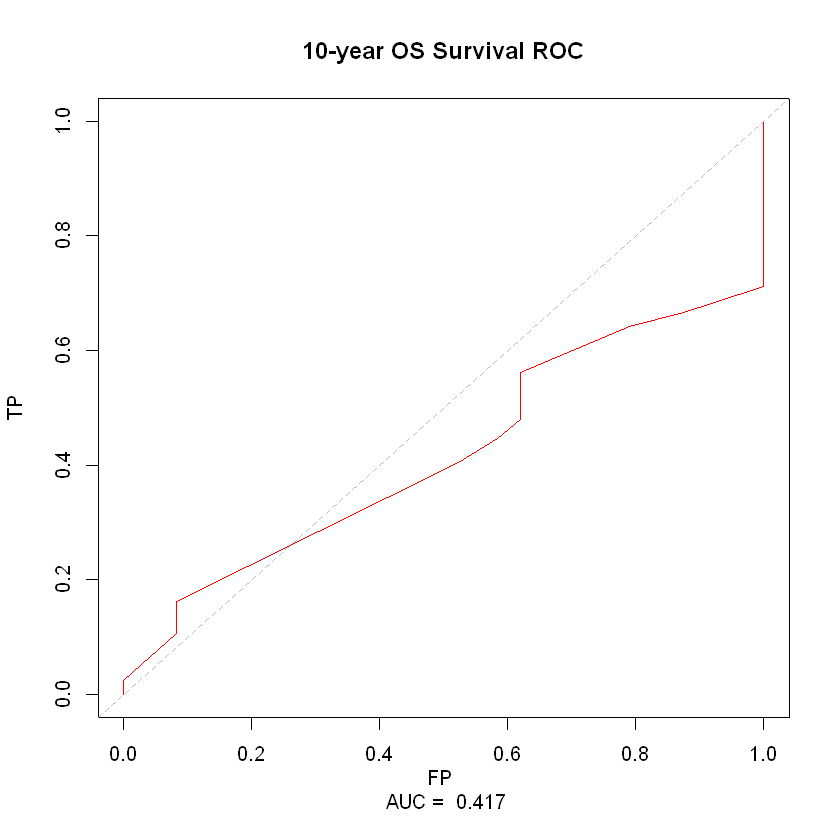

In [68]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [69]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.922 0.89 0.712 ...
 $ FP          : num [1:20] 1 0.992 0.994 0.979 0.966 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.493


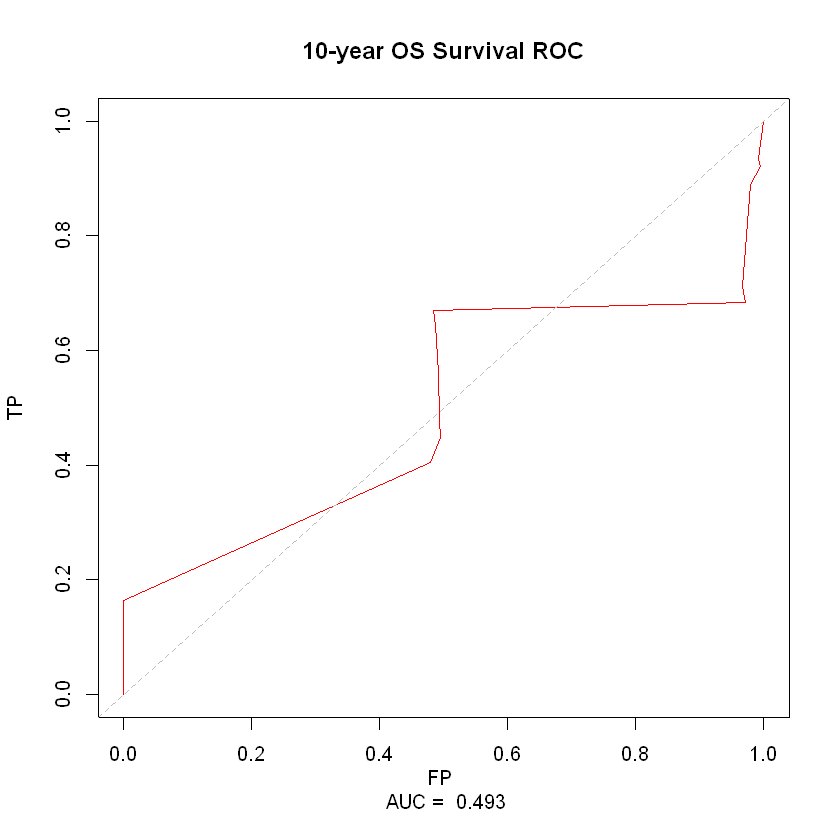

In [70]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [71]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$OS,##生存时间
                     status=data$Y1,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ FP          : num [1:284] 1 0.983 0.966 0.95 0.935 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.625


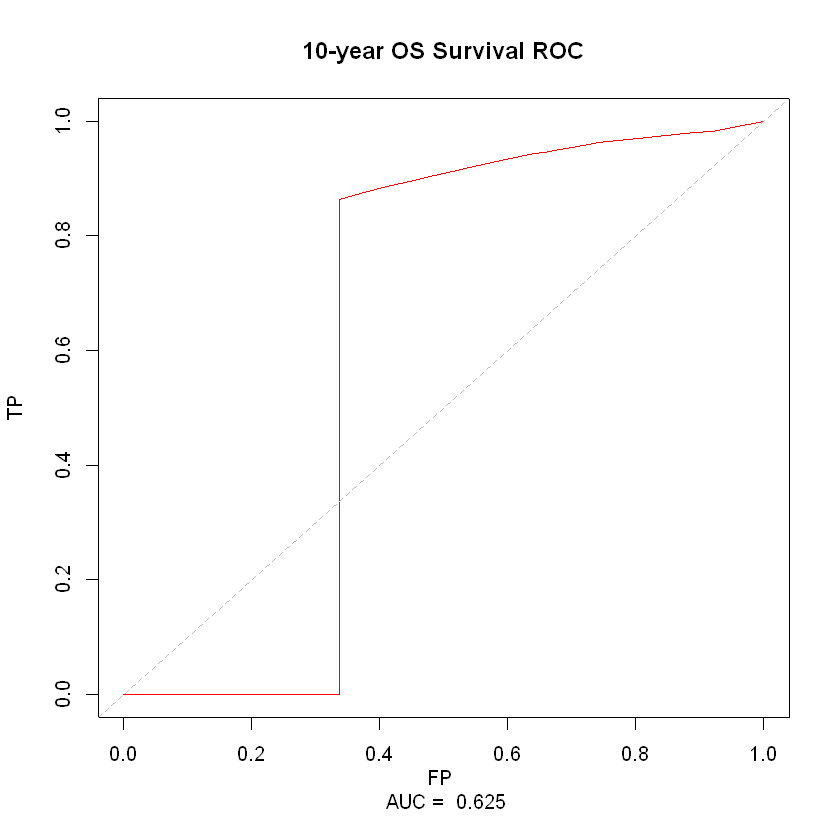

In [72]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year OS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [73]:
data10= survivalROC(  Stime=data$OS,  
                     status=data$Y1,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ FP          : num [1:284] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00815
 $ AUC         : num 0.94


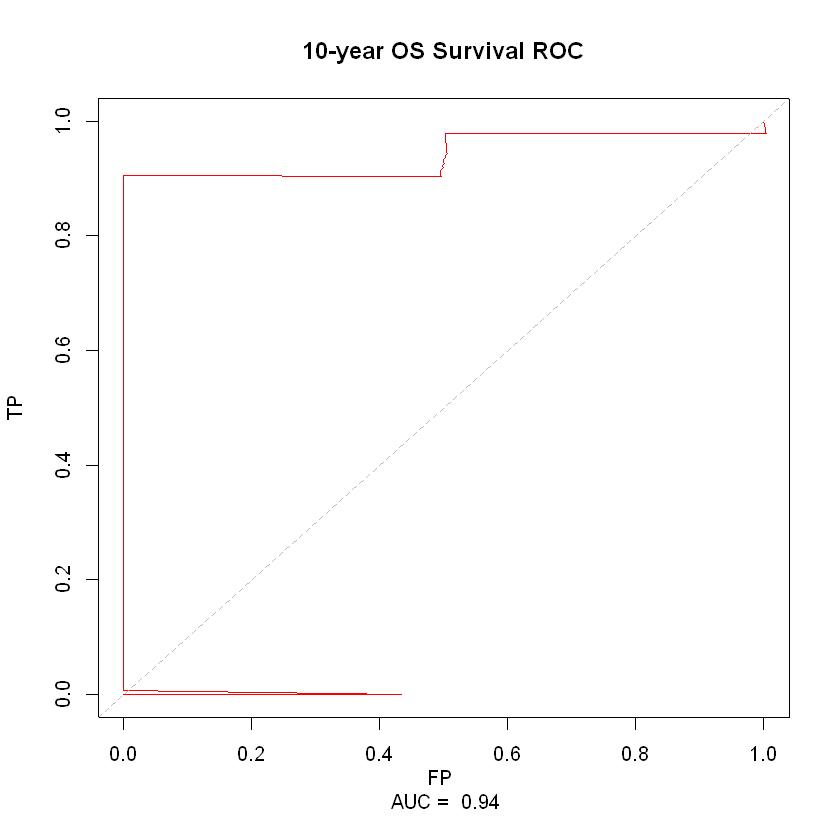

In [74]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year OS Survival ROC")
abline(0,1,col="gray",lty=2)

# 10-year DFS

### Clinical Score

In [75]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC( Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$CS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.921 0.889 0.711 ...
 $ FP          : num [1:20] 1 1 1 1 1 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.422


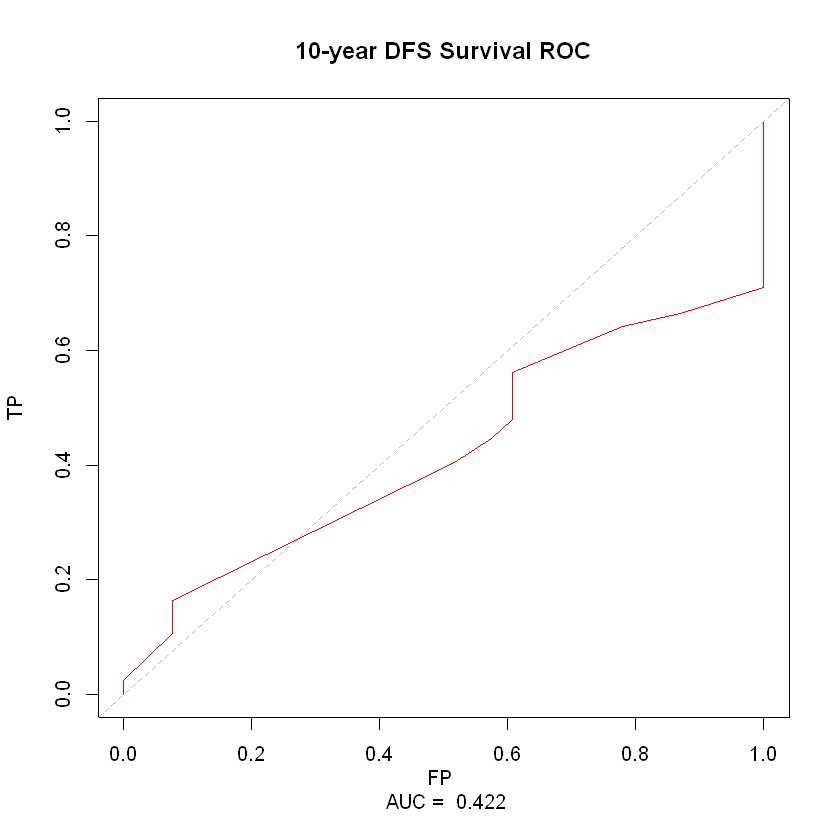

In [76]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [77]:
data10= survivalROC( Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$CS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:20] -Inf -0.31 -0.286 -0.262 -0.239 ...
 $ TP          : num [1:20] 1 0.936 0.921 0.889 0.711 ...
 $ FP          : num [1:20] 1 1 1.005 0.994 0.997 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.484


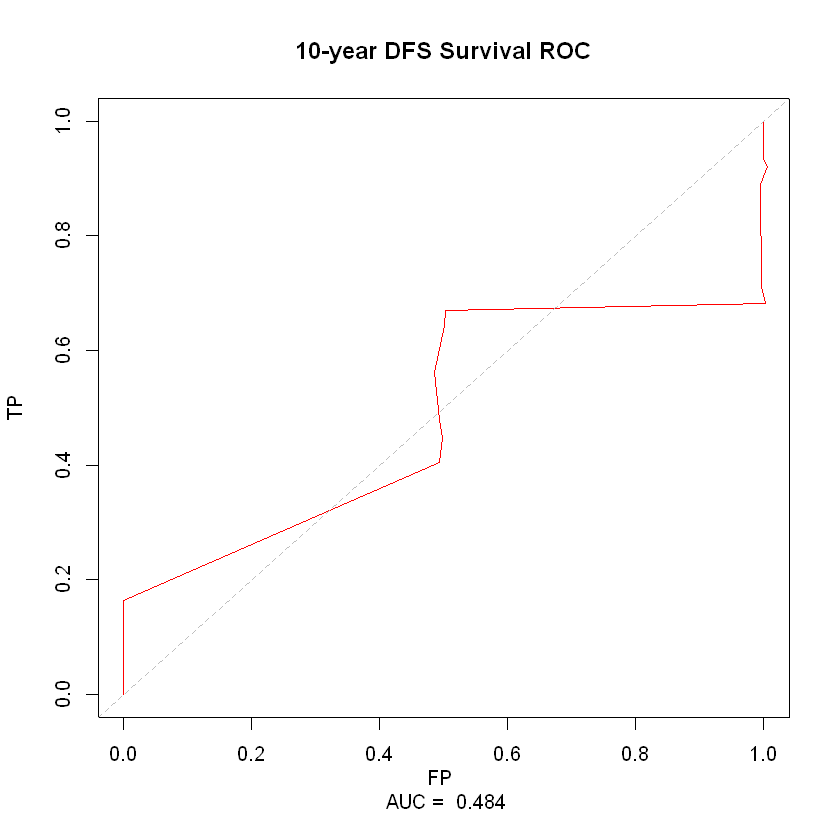

In [78]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)

### Radiomics Score

In [79]:
cutoff=3650 #730, 1095, 1825, 2555, 3650
data10= survivalROC(  Stime=data$DFS,##生存时间
                     status=data$Y2,## 终止事件    
                     marker = data$RS, ## marker value    
                     predict.time = cutoff,## 预测时间截点
                     span = 0.25*nobs^(-0.20))##span,NNE法的namda
str(data10)## list结构

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.997 0.993 0.99 0.986 ...
 $ FP          : num [1:284] 1 0.983 0.967 0.951 0.936 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.628


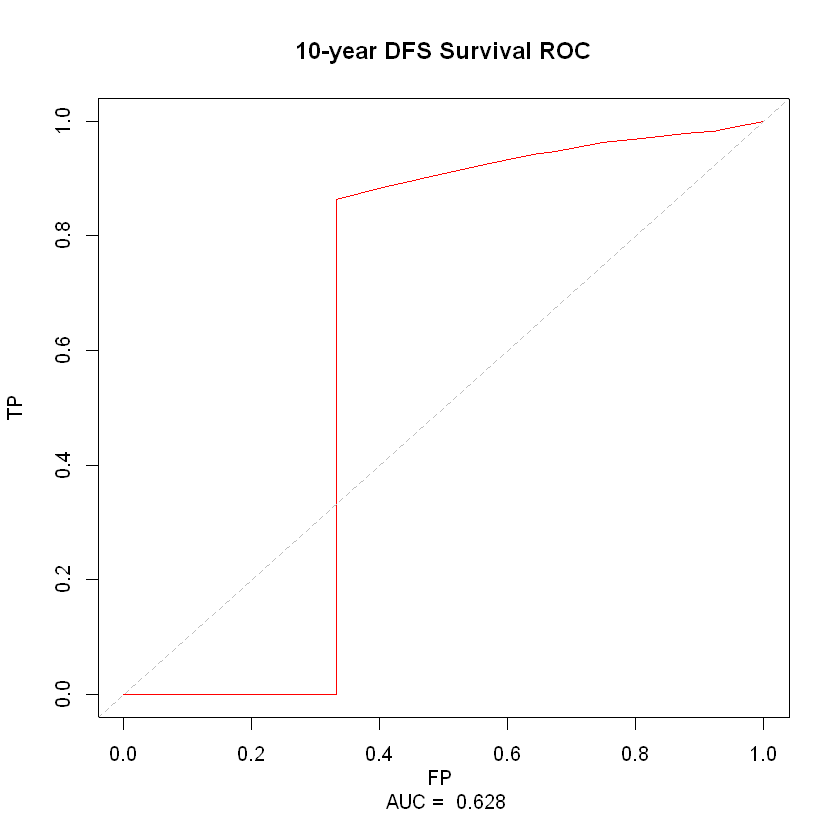

In [80]:
plot(data10$FP, data10$TP, ## x=FP,y=TP
     type="l",col="red", ##线条设置
     xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), ##连接
     ylab="TP",
     main="10-year DFS Survival ROC")## \n换行符
abline(0,1,col="gray",lty=2)##线条颜色

In [81]:
data10= survivalROC(  Stime=data$DFS,  
                     status=data$Y2,      
                     marker = data$RS,     
                     predict.time =  cutoff, method="KM")
str(data10)

List of 6
 $ cut.values  : num [1:284] -Inf -0.572 -0.537 -0.389 -0.377 ...
 $ TP          : num [1:284] 1 0.996 0.993 0.989 0.986 ...
 $ FP          : num [1:284] 1 1 1.01 1.01 1.01 ...
 $ predict.time: num 3650
 $ Survival    : num 0.00929
 $ AUC         : num 0.94


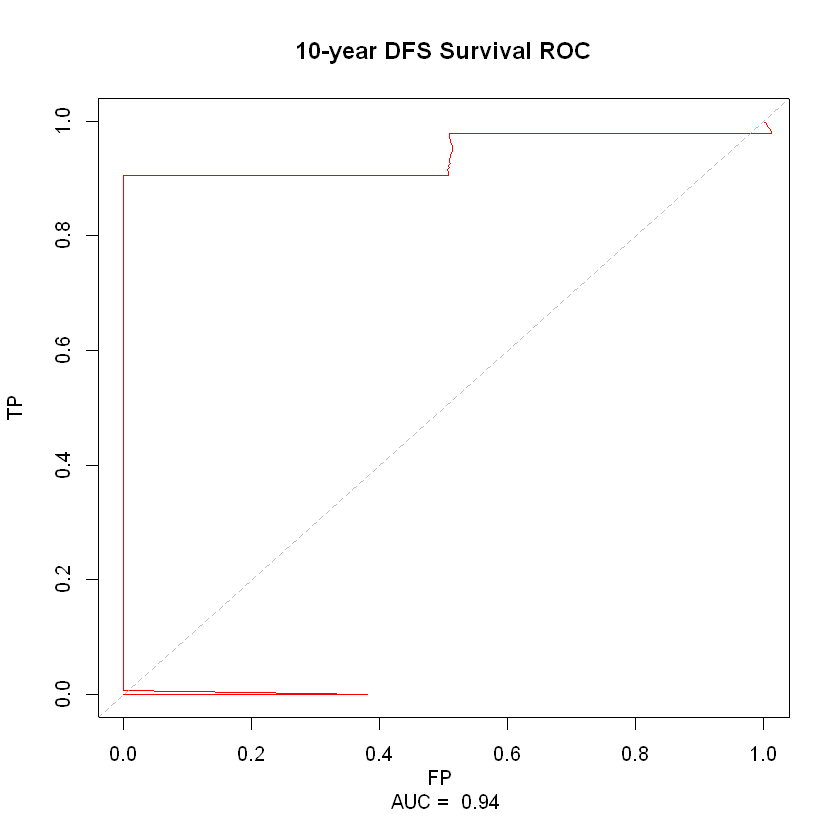

In [82]:
plot(data10$FP, data10$TP, 
     type="l",col="red",xlim=c(0,1), ylim=c(0,1),   
     xlab=paste( "FP", "\n", "AUC = ",round(data10$AUC,3)), 
     ylab="TP",
     main="10-year DFS Survival ROC")
abline(0,1,col="gray",lty=2)